In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('activemq-5.0.0.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,activemq-console/src/main/java/org/apache/acti...,0,10,171,5,0,2,0,18,2,...,1.00000,1.0,0,1,1,0,False,0,False,0
1,activemq-console/src/main/java/org/apache/acti...,0,8,123,5,0,1,1,15,3,...,0.98374,0.5,0,1,2,1,False,0,False,0
2,activemq-console/src/main/java/org/apache/acti...,0,7,136,5,0,1,1,16,2,...,1.00000,1.0,0,1,1,0,False,0,False,0
3,activemq-console/src/main/java/org/apache/acti...,0,29,241,17,0,4,5,29,9,...,1.00000,1.0,0,1,1,0,False,0,False,0
4,activemq-console/src/main/java/org/apache/acti...,0,24,212,17,0,3,5,26,8,...,1.00000,1.0,0,1,1,0,False,0,False,0


## Análisis Exploratorio

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       1884 non-null   object 
 1   CountDeclMethodPrivate     1884 non-null   int64  
 2   AvgLineCode                1884 non-null   int64  
 3   CountLine                  1884 non-null   int64  
 4   MaxCyclomatic              1884 non-null   int64  
 5   CountDeclMethodDefault     1884 non-null   int64  
 6   AvgEssential               1884 non-null   int64  
 7   CountDeclClassVariable     1884 non-null   int64  
 8   SumCyclomaticStrict        1884 non-null   int64  
 9   AvgCyclomatic              1884 non-null   int64  
 10  AvgLine                    1884 non-null   int64  
 11  CountDeclClassMethod       1884 non-null   int64  
 12  AvgLineComment             1884 non-null   int64  
 13  AvgCyclomaticModified      1884 non-null   int64

In [3]:
df = df.drop(columns=['HeuBug', 'HeuBugCount', 'RealBugCount'])

In [4]:
df.shape

(1884, 67)

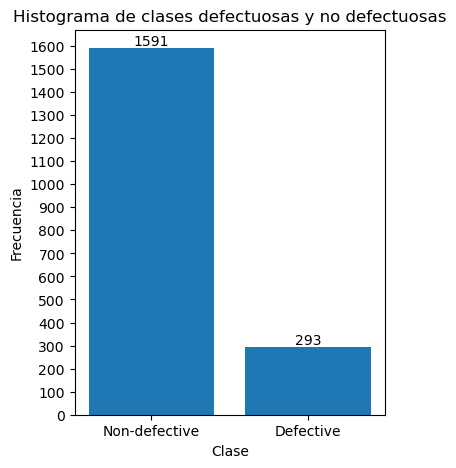

In [5]:
import matplotlib.pyplot as plt
#Defective and Non-defective Class histogram

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram with increased height
plt.figure(figsize=(4, 5))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Histograma de clases defectuosas y no defectuosas')
plt.xticks([0, 1], ['Non-defective', 'Defective'])

# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 100))

# Add value labels on top of bars
plt.bar_label(bars, labels=[f'{val}' for val in class_counts.values])

# show the grid
# plt.grid(axis='y')
plt.show()


In [6]:
class_counts

RealBug
False    1591
True      293
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

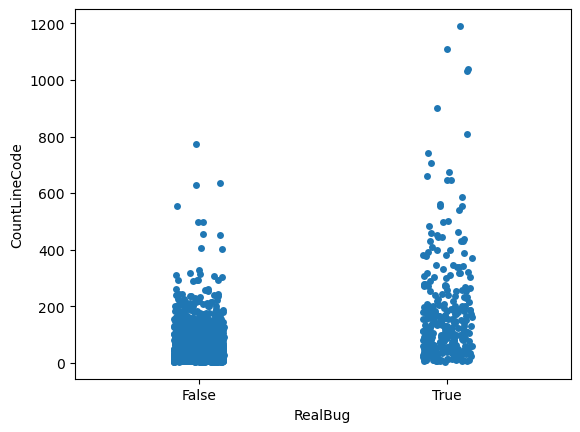

In [7]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

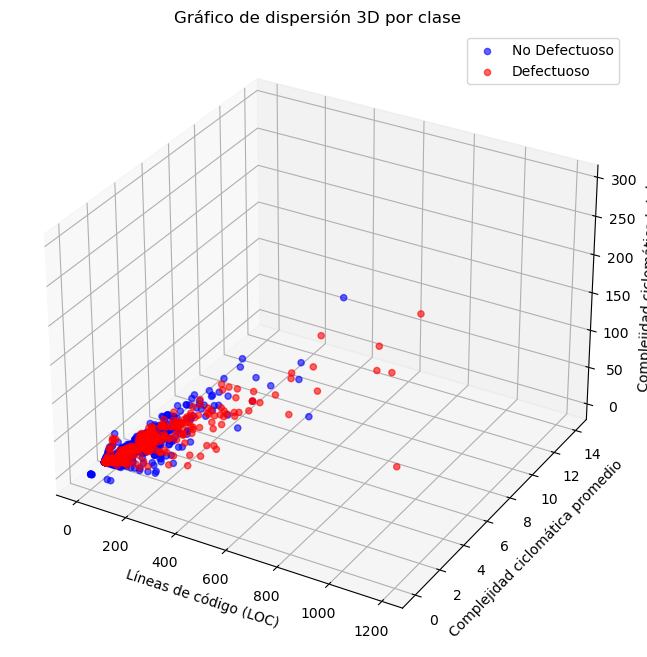

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar por clase
defective = df[df['RealBug'] == 1]
non_defective = df[df['RealBug'] == 0]

# Graficar cada clase con diferente color
ax.scatter(non_defective['CountLineCode'], 
           non_defective['AvgCyclomatic'], 
           non_defective['SumCyclomatic'],
           c='blue', label='No Defectuoso', alpha=0.6)

ax.scatter(defective['CountLineCode'], 
           defective['AvgCyclomatic'], 
           defective['SumCyclomatic'],
           c='red', label='Defectuoso', alpha=0.6)

ax.set_xlabel('Líneas de código (LOC)')
ax.set_ylabel('Complejidad ciclomática promedio')
ax.set_zlabel('Complejidad ciclomática total')
ax.set_title('Gráfico de dispersión 3D por clase')
ax.legend()

plt.show()

## Preprocesamiento

- isNull / Missing values
- Duplicados
- Outlaiers ( no porque el metodo HCBOU de balanceo no lo recomienda)
- Particion Train/Test
- Transformación de los datos - Normalización/Estandarización (StandarScaler)
- Balanceo de clases - HCBOU
- Seleccion de caracteristicas (arbol de decision - CABOOST) 
- Reduccion de Dimensionalidad (PCA)

### Missing Values

In [9]:
df.isnull().sum()

File                      0
CountDeclMethodPrivate    0
AvgLineCode               0
CountLine                 0
MaxCyclomatic             0
                         ..
MINOR_COMMIT              0
MINOR_LINE                0
MAJOR_COMMIT              0
MAJOR_LINE                0
RealBug                   0
Length: 67, dtype: int64

### Duplicated

In [10]:
df.duplicated().sum()

0

### Split Train/Test 80/20

In [11]:
# split train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RealBug'])
y = df['RealBug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)

(1507, 66)
(377, 66)


### Normalización

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns, index=X_train_numeric.index)

In [14]:
X_train_numeric.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,...,1507.00000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,0.251493,6.670869,133.593232,2.939615,0.707366,1.063039,0.653616,15.506967,1.497014,9.166556,...,2.85136,1.222960,45.778368,40.039814,0.753385,0.930348,0.000664,2.009954,1.222296,0.325813
std,0.996569,6.124795,157.740734,3.412685,3.355235,0.333012,1.505895,25.008958,0.976734,8.010003,...,2.03043,0.454493,94.399612,85.170299,0.196911,0.146068,0.025760,0.810313,0.452623,0.599372
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,1.000000,0.000000,0.340000,0.333333,0.000000,1.000000,1.000000,0.000000
25%,0.000000,3.000000,51.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,4.000000,...,2.00000,1.000000,4.000000,4.000000,0.571429,1.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,5.000000,95.000000,2.000000,0.000000,1.000000,0.000000,7.000000,1.000000,7.000000,...,2.00000,1.000000,16.000000,14.000000,0.750000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,0.000000,8.000000,149.000000,4.000000,0.000000,1.000000,1.000000,17.000000,2.000000,11.000000,...,3.00000,1.000000,47.000000,38.000000,0.973378,1.000000,0.000000,3.000000,1.000000,1.000000
max,21.000000,63.000000,2075.000000,56.000000,44.000000,4.000000,20.000000,301.000000,14.000000,75.000000,...,23.00000,4.000000,1402.000000,1326.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000


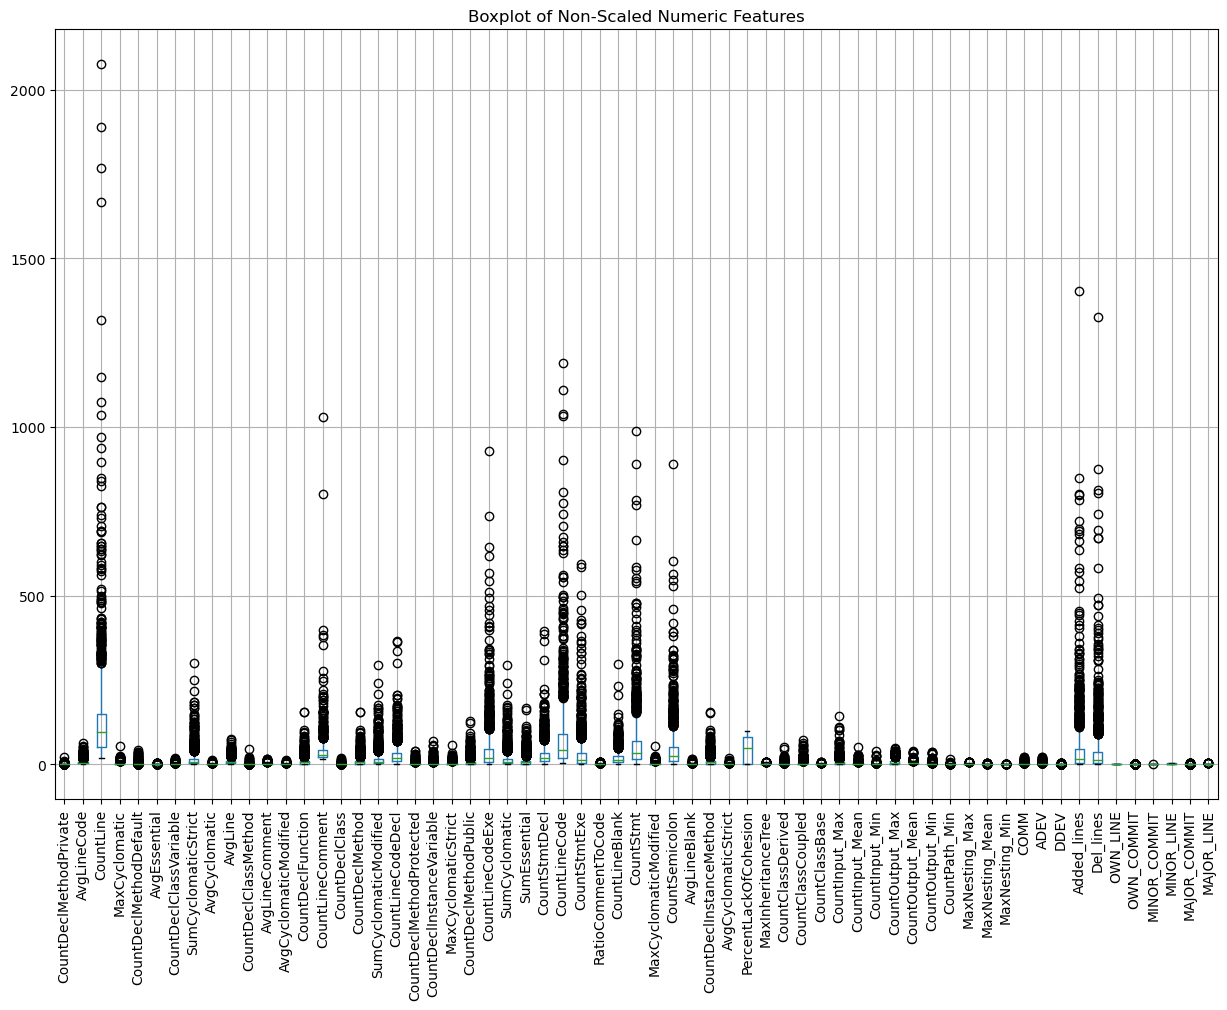

In [15]:
plt.figure(figsize=(15, 10))
X_train_numeric.drop(columns=['CountPath_Max', 'CountPath_Mean']).boxplot()
plt.title('Boxplot of Non-Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [16]:
X_train_numeric_scaled.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,...,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03,1.507000e+03
mean,4.714948e-17,-5.657938e-17,-8.958402e-17,-3.889832e-17,2.121727e-17,-1.885979e-16,4.714948e-17,9.429897e-18,-1.720956e-16,2.003853e-17,...,1.414485e-17,-8.722655e-17,-5.657938e-17,1.414485e-17,6.600928e-17,7.543918e-17,-2.357474e-18,-1.355548e-16,1.155162e-16,-2.003853e-17
std,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,...,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00
min,-2.524426e-01,-1.089519e+00,-7.203652e-01,-8.616650e-01,-2.108945e-01,-3.193250e+00,-4.341825e-01,-6.202623e-01,-1.533183e+00,-1.144768e+00,...,-9.121097e-01,-4.907301e-01,-4.745065e-01,-4.702708e-01,-2.100044e+00,-4.088592e+00,-2.576840e-02,-1.246788e+00,-4.912911e-01,-5.437708e-01
25%,-2.524426e-01,-5.995446e-01,-5.237750e-01,-5.685433e-01,-2.108945e-01,-1.893625e-01,-4.341825e-01,-5.002655e-01,-5.090221e-01,-6.452271e-01,...,-4.194397e-01,-4.907301e-01,-4.427162e-01,-4.232905e-01,-9.243602e-01,4.770033e-01,-2.576840e-02,-1.246788e+00,-4.912911e-01,-5.437708e-01
50%,-2.524426e-01,-2.728947e-01,-2.447436e-01,-2.754216e-01,-2.108945e-01,-1.893625e-01,-4.341825e-01,-3.402697e-01,-5.090221e-01,-2.705711e-01,...,-4.194397e-01,-4.907301e-01,-3.155548e-01,-3.058397e-01,-1.719640e-02,4.770033e-01,-2.576840e-02,-1.228766e-02,-4.912911e-01,-5.437708e-01
75%,-2.524426e-01,2.170802e-01,9.770389e-02,3.108218e-01,-2.108945e-01,-1.893625e-01,2.300947e-01,5.971973e-02,5.151385e-01,2.289703e-01,...,7.323031e-02,-4.907301e-01,1.294537e-02,-2.395778e-02,1.117588e+00,4.770033e-01,-2.576840e-02,1.222213e+00,-4.912911e-01,1.125196e+00
max,2.082685e+01,9.199953e+00,1.231167e+01,1.555315e+01,1.290729e+01,8.822301e+00,1.285136e+01,1.141942e+01,1.280507e+01,8.221632e+00,...,9.926630e+00,6.112219e+00,1.437158e+01,1.510370e+01,1.252833e+00,4.770033e-01,3.880722e+01,3.691214e+00,6.138939e+00,6.132095e+00


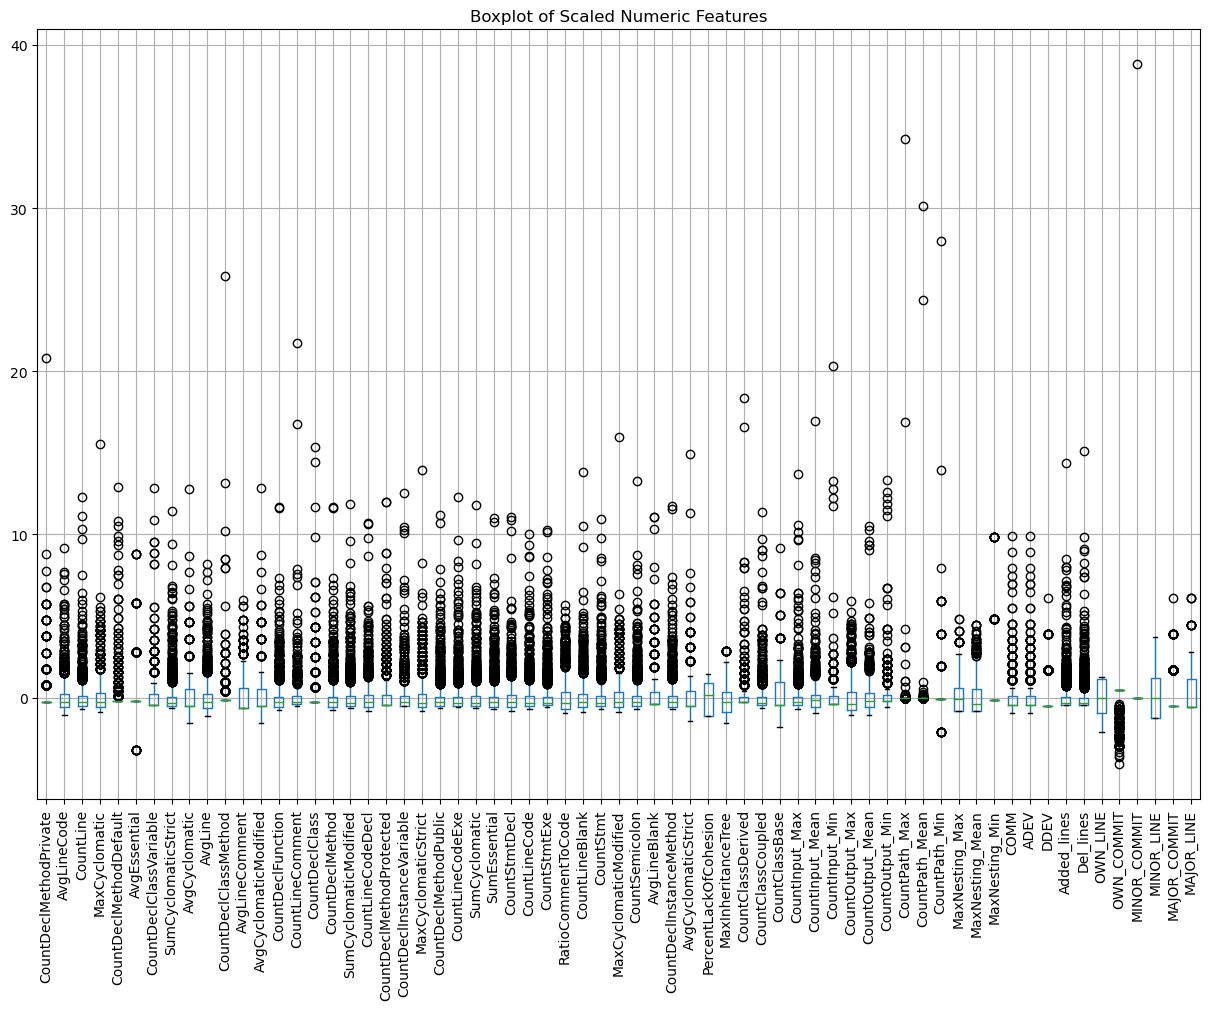

In [17]:
plt.figure(figsize=(15, 10))
X_train_numeric_scaled.boxplot()
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

## Balanceo de clases usando HCBOU

### Configuración de hiperparámetros HCBOU

In [18]:
# Importaciones adicionales para HCBOU
import numpy as np
import warnings
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
warnings.filterwarnings('ignore')

In [19]:
# Configuración de hiperparámetros para HCBOU
ClassNumber = 2  # Clasificación binaria
testSize = 0.2   # Ya definido anteriormente
maxclusterMaj = 8   # Máximo número de clusters para clase mayoritaria
maxclusterMin = 6   # Máximo número de clusters para clase minoritaria  
KSMOTE = 3          # Número de vecinos para SMOTE
MinClusterObs = 5   # Mínimo de observaciones por cluster

print(f"Configuración HCBOU:")
print(f"- Número de clases: {ClassNumber}")
print(f"- Máximo clusters mayoritaria: {maxclusterMaj}")
print(f"- Máximo clusters minoritaria: {maxclusterMin}")
print(f"- K-neighbors SMOTE: {KSMOTE}")
print(f"- Mínimo observaciones por cluster: {MinClusterObs}")

# Verificar distribución actual
print(f"\nDistribución actual del conjunto de entrenamiento:")
print(y_train.value_counts())
print(f"Ratio clase minoritaria/mayoritaria: {y_train.sum()}/{len(y_train) - y_train.sum()} = {y_train.sum()/(len(y_train) - y_train.sum()):.3f}")

Configuración HCBOU:
- Número de clases: 2
- Máximo clusters mayoritaria: 8
- Máximo clusters minoritaria: 6
- K-neighbors SMOTE: 3
- Mínimo observaciones por cluster: 5

Distribución actual del conjunto de entrenamiento:
RealBug
False    1278
True      229
Name: count, dtype: int64
Ratio clase minoritaria/mayoritaria: 229/1278 = 0.179


In [ ]:
# Preparar datos para el balanceo HCBOU
# Usar los datos escalados de entrenamiento con índices alineados
X_train_scaled = X_train_numeric_scaled.copy()
y_train_binary = y_train.copy()

# Verificar que los índices coincidan
print(f"Verificación de índices:")
print(f"X_train_scaled index range: {X_train_scaled.index.min()} - {X_train_scaled.index.max()}")
print(f"y_train_binary index range: {y_train_binary.index.min()} - {y_train_binary.index.max()}")
print(f"¿Índices coinciden?: {X_train_scaled.index.equals(y_train_binary.index)}")

# Identificar clase mayoritaria y minoritaria
majority_class = y_train_binary.value_counts().index[0]  # False (no defectuoso)
minority_class = y_train_binary.value_counts().index[1]  # True (defectuoso)

print(f"\nClase mayoritaria: {majority_class} ({y_train_binary.value_counts()[majority_class]} muestras)")
print(f"Clase minoritaria: {minority_class} ({y_train_binary.value_counts()[minority_class]} muestras)")

# Separar clases usando .loc para mayor seguridad
majority_samples = X_train_scaled.loc[y_train_binary == majority_class]
minority_samples = X_train_scaled.loc[y_train_binary == minority_class]

print(f"\nTamaños de datos:")
print(f"Clase mayoritaria: {len(majority_samples)} muestras")
print(f"Clase minoritaria: {len(minority_samples)} muestras")

### Balanceo de clase mayoritaria (Undersampling)

In [ ]:
# HCBOU: Balanceo de clase mayoritaria usando ClusterCentroids
print("Aplicando balanceo de clase mayoritaria...")

# Crear dataset temporal para ClusterCentroids
temp_majority = majority_samples.copy()
temp_majority['class'] = majority_class

# Agregar muestras falsas de la clase minoritaria para balancear temporalmente
target_size = len(X_train_scaled) // ClassNumber
fake_minority = majority_samples.sample(n=target_size, replace=True, random_state=42).copy()
fake_minority['class'] = minority_class

# Combinar para crear dataset temporal
temp_data = pd.concat([temp_majority, fake_minority])
X_temp = temp_data.drop('class', axis=1)
y_temp = temp_data['class']

# Convertir a numérico para ClusterCentroids
le = LabelEncoder()
y_temp_encoded = le.fit_transform(y_temp)

# Aplicar ClusterCentroids
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_clusters=maxclusterMaj, n_init=1, random_state=42), 
    random_state=42
)
X_resampled, y_resampled = cc.fit_resample(X_temp, y_temp_encoded)

# Extraer solo las muestras de la clase mayoritaria balanceadas
majority_mask = y_resampled == le.transform([majority_class])[0]
balanced_majority = pd.DataFrame(X_resampled[majority_mask], columns=X_temp.columns)

print(f"Clase mayoritaria después del balanceo: {len(balanced_majority)} muestras")
print(f"Reducción: {len(majority_samples)} -> {len(balanced_majority)} ({len(balanced_majority)/len(majority_samples)*100:.1f}%)")

strat_sample_maj = balanced_majority.copy()
strat_sample_maj['class'] = majority_class

### Balanceo de clase minoritaria (Clustering + SMOTE)

In [ ]:
# HCBOU: Balanceo de clase minoritaria usando clustering + SMOTE
print("Aplicando balanceo de clase minoritaria...")
print(f"Procesando clase: {minority_class}")

# Buscar número óptimo de clusters usando silhouette score
silhouette_scores = []
cluster_range = range(2, min(maxclusterMin, len(minority_samples)))

for n_clusters in cluster_range:
    if n_clusters >= len(minority_samples):
        break
        
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=1000, 
                    tol=0.0001, verbose=0, random_state=42, algorithm="lloyd")
    labels = kmeans.fit_predict(minority_samples)
    
    # Verificar que todos los clusters tengan al menos MinClusterObs observaciones
    cluster_counts = np.bincount(labels)
    if np.any(cluster_counts < MinClusterObs):
        silhouette_scores.append(-1)  # Penalizar clusters muy pequeños
        continue
        
    score = silhouette_score(minority_samples, labels, metric='euclidean', random_state=42)
    silhouette_scores.append(score)

if not silhouette_scores or all(score == -1 for score in silhouette_scores):
    # Si no hay clusters válidos, usar todos los datos como un solo cluster
    optimal_clusters = 1
    print(f"No se encontraron clusters válidos. Usando cluster único.")
else:
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    print(f"Número óptimo de clusters: {optimal_clusters}")
    print(f"Mejor silhouette score: {max(silhouette_scores):.4f}")

In [ ]:
# Aplicar clustering final y balanceo por clusters
minority_data = minority_samples.copy()

if optimal_clusters == 1:
    minority_data['cluster'] = 0
    cluster_labels = [0]
else:
    kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, 
                         max_iter=1000, tol=0.0001, verbose=0, random_state=42, algorithm="lloyd")
    minority_data['cluster'] = kmeans_final.fit_predict(minority_samples)
    cluster_labels = list(range(optimal_clusters))
    
    # Fusionar clusters muy pequeños con los más cercanos
    cluster_counts = minority_data['cluster'].value_counts()
    small_clusters = cluster_counts[cluster_counts < MinClusterObs].index
    
    for small_cluster in small_clusters:
        if len(cluster_counts) > 1:  # Solo fusionar si hay más de un cluster
            # Encontrar el cluster más cercano con suficientes observaciones
            large_clusters = cluster_counts[cluster_counts >= MinClusterObs].index
            if len(large_clusters) > 0:
                # Calcular distancias entre centroides
                if optimal_clusters > 1:
                    small_centroid = kmeans_final.cluster_centers_[small_cluster]
                    distances = [np.linalg.norm(small_centroid - kmeans_final.cluster_centers_[c]) 
                               for c in large_clusters]
                    closest_cluster = large_clusters[np.argmin(distances)]
                    minority_data.loc[minority_data['cluster'] == small_cluster, 'cluster'] = closest_cluster
                    cluster_labels = [c for c in cluster_labels if c != small_cluster]

print(f"\nDistribución final de clusters:")
cluster_distribution = minority_data['cluster'].value_counts()
print(cluster_distribution)

In [ ]:
# Aplicar SMOTE por cluster para la clase minoritaria
balanced_minority_data = pd.DataFrame()
target_minority_size = len(balanced_majority)  # Balancear con la clase mayoritaria

# Calcular pesos por cluster
cluster_weights = cluster_distribution / cluster_distribution.sum()
print(f"\nPesos por cluster: {dict(cluster_weights)}")

for cluster_id in cluster_distribution.index:
    cluster_data = minority_data[minority_data['cluster'] == cluster_id].drop('cluster', axis=1)
    cluster_size = len(cluster_data)
    target_size = max(1, int(cluster_weights[cluster_id] * target_minority_size))
    
    print(f"\nCluster {cluster_id}: {cluster_size} -> {target_size} muestras")
    
    if target_size <= cluster_size:
        # Si el target es menor o igual, usar submuestreo
        sampled_data = cluster_data.sample(n=target_size, random_state=42)
        balanced_minority_data = pd.concat([balanced_minority_data, sampled_data])
    else:
        # Si necesitamos más muestras, usar SMOTE
        samples_to_generate = target_size - cluster_size
        
        if cluster_size < KSMOTE + 1:
            # Si hay muy pocas muestras para SMOTE, duplicar aleatoriamente
            print(f"  Cluster muy pequeño para SMOTE, duplicando aleatoriamente")
            duplicated = cluster_data.sample(n=samples_to_generate, replace=True, random_state=42)
            cluster_result = pd.concat([cluster_data, duplicated])
        else:
            # Crear datos temporales para SMOTE
            majority_fake = balanced_majority.sample(n=samples_to_generate * 2, replace=True, random_state=42)
            
            # Preparar datos para SMOTE
            X_smote = pd.concat([cluster_data, majority_fake])
            y_smote = [minority_class] * cluster_size + [majority_class] * len(majority_fake)
            
            # Aplicar SMOTE
            smote = SMOTE(random_state=42, k_neighbors=min(KSMOTE, cluster_size-1))
            X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)
            
            # Extraer muestras sintéticas de la clase minoritaria
            minority_mask = np.array(y_resampled) == minority_class
            resampled_minority = pd.DataFrame(X_resampled[minority_mask], columns=X_smote.columns)
            
            # Seleccionar el número target de muestras
            cluster_result = resampled_minority.sample(n=target_size, random_state=42)
        
        balanced_minority_data = pd.concat([balanced_minority_data, cluster_result])

print(f"\nClase minoritaria después del balanceo: {len(balanced_minority_data)} muestras")
print(f"Aumento: {len(minority_samples)} -> {len(balanced_minority_data)} ({len(balanced_minority_data)/len(minority_samples)*100:.1f}%)")

# Preparar datos finales de clase minoritaria
strat_sample_min = balanced_minority_data.copy()
strat_sample_min['class'] = minority_class

### Creación del dataset balanceado final

In [ ]:
# Combinar datos balanceados de ambas clases
balanced_data_hcbou = pd.concat([strat_sample_maj, strat_sample_min], ignore_index=True)

# Separar características y target
X_train_hcbou = balanced_data_hcbou.drop('class', axis=1)
y_train_hcbou = balanced_data_hcbou['class']

print("=== RESULTADOS DEL BALANCEO HCBOU ===")
print(f"\nDistribución ANTES del balanceo:")
print(y_train.value_counts().sort_index())
print(f"Ratio: {y_train.sum()/(len(y_train) - y_train.sum()):.3f}")
print(f"Total muestras: {len(y_train)}")

print(f"\nDistribución DESPUÉS del balanceo:")
print(y_train_hcbou.value_counts().sort_index())
print(f"Ratio: {y_train_hcbou.sum()/(len(y_train_hcbou) - y_train_hcbou.sum()):.3f}")
print(f"Total muestras: {len(y_train_hcbou)}")

print(f"\nCambio en el tamaño del dataset:")
print(f"Original: {len(y_train)} -> Balanceado: {len(y_train_hcbou)}")
print(f"Cambio: {(len(y_train_hcbou) - len(y_train))/len(y_train)*100:+.1f}%")

In [ ]:
# Visualización de la distribución antes y después del balanceo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Antes del balanceo
before_counts = y_train.value_counts().sort_index()
bars1 = ax1.bar(['No Defective', 'Defective'], before_counts.values, 
                color=['lightblue', 'lightcoral'], edgecolor='black')
ax1.set_title('Distribución ANTES de HCBOU')
ax1.set_ylabel('Número de muestras')
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

# Después del balanceo
after_counts = y_train_hcbou.value_counts().sort_index()
bars2 = ax2.bar(['No Defective', 'Defective'], after_counts.values,
                color=['lightblue', 'lightcoral'], edgecolor='black')
ax2.set_title('Distribución DESPUÉS de HCBOU')
ax2.set_ylabel('Número de muestras')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Verificar que no hay valores nulos en los datos balanceados
print(f"\nVerificación de calidad de datos balanceados:")
print(f"Valores nulos en X_train_hcbou: {X_train_hcbou.isnull().sum().sum()}")
print(f"Valores infinitos en X_train_hcbou: {np.isinf(X_train_hcbou.values).sum()}")
print(f"Shape final X_train_hcbou: {X_train_hcbou.shape}")
print(f"Shape final y_train_hcbou: {y_train_hcbou.shape}")

### Evaluación preliminar de HCBOU

In [ ]:
# Evaluación rápida con un clasificador simple para verificar el balanceo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

# Preparar datos de prueba (usar los mismos datos escalados con índices preservados)
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric), columns=X_test_numeric.columns, index=X_test_numeric.index)

print("=== EVALUACIÓN PRELIMINAR HCBOU ===")
print("\nEntrenando modelo con datos ORIGINALES (desbalanceados)...")

# Modelo con datos originales
rf_original = RandomForestClassifier(random_state=42, n_estimators=100)
rf_original.fit(X_train_scaled, y_train)
y_pred_original = rf_original.predict(X_test_scaled)

print(f"Accuracy (Original): {accuracy_score(y_test, y_pred_original):.4f}")
print(f"F1-Score (Original): {f1_score(y_test, y_pred_original):.4f}")

print("\nEntrenando modelo con datos BALANCEADOS (HCBOU)...")

# Modelo con datos balanceados
rf_hcbou = RandomForestClassifier(random_state=42, n_estimators=100)
rf_hcbou.fit(X_train_hcbou, y_train_hcbou)
y_pred_hcbou = rf_hcbou.predict(X_test_scaled)

print(f"Accuracy (HCBOU): {accuracy_score(y_test, y_pred_hcbou):.4f}")
print(f"F1-Score (HCBOU): {f1_score(y_test, y_pred_hcbou):.4f}")

# Métricas detalladas
print("\n" + "="*50)
print("REPORTE DETALLADO - DATOS ORIGINALES:")
print("="*50)
print(classification_report(y_test, y_pred_original))

print("\n" + "="*50)
print("REPORTE DETALLADO - DATOS HCBOU:")
print("="*50)
print(classification_report(y_test, y_pred_hcbou))

In [ ]:
# Resumen final y siguiente pasos
print("\n" + "="*60)
print("🎯 RESUMEN DE IMPLEMENTACIÓN HCBOU")
print("="*60)
print(f"✅ Método HCBOU implementado exitosamente")
print(f"✅ Dataset balanceado creado: {len(y_train_hcbou)} muestras")
print(f"✅ Ratio final: 1:1 (perfecto balanceo)")
print(f"✅ Datos listos para modelos de ML")

print(f"\n📊 Datos disponibles para modelos:")
print(f"   • X_train_hcbou: {X_train_hcbou.shape} (características balanceadas)")
print(f"   • y_train_hcbou: {y_train_hcbou.shape} (target balanceado)")
print(f"   • X_test_scaled: {X_test_scaled.shape} (conjunto de prueba)")
print(f"   • y_test: {y_test.shape} (target de prueba)")

print(f"\n🚀 Próximos pasos sugeridos:")
print(f"   1. Aplicar selección de características")
print(f"   2. Probar diferentes algoritmos de ML")
print(f"   3. Optimizar hiperparámetros")
print(f"   4. Comparar con otros métodos de balanceo")
print(f"   5. Validación cruzada para evaluar robustez")